* Systems Design, Integration and Control
* CSIM
* Katherine Robles Martínez de la Vega


---

# **By Carrot or by Stick: Cognitive Reinforcement Learning in Parkinsonism**

Frank, M. J., Seeberger, L. C., & O'Reilly, R. C. (2004). By Carrot or by Stick: Cognitive Reinforcement Learning in Parkinsonism. *Science, 306*(5703), 1940-1943. DOI: 10.1126/science.1102941

Frank et al. (2004) explored the involvement of DA interactions in probabilistic and deterministic tasks in Parkinson's Disease patients. *'Due to depleted DA, those patients OFF medication should have deficits in learning from positive feedback, whereas those ON medication should learn from positive feedback'*. This means those patients with high DA levels should choose always the option that gives them positive rewards and those with low DA levels should avoid always the option that does not give reward or gives negative rewards.
This project aims to simulate both tasks presented in the paper.

# **Deterministic Task**

The deterministic task consists of 4 pairs of stimuli presented ramdomly with positive feedback (`reward=1`) and negative feedback (`reward=0`). Here a hierarchy emerges, where stimuli near to the top has positive associations and stimuli near to the bottom has negative associations.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Defining the states

In [20]:
# Define the states
pair_states = {
    'AB' : 0,
    'AC' : 1,
    'AD' : 2,
    'AE' : 3,
    'AF' : 4,
    'BC' : 5,
    'BD' : 6,
    'BE' : 7,
    'BF' : 8,
    'CD' : 9,
    'CE' : 10,
    'CF' : 11,
    'DE' : 12,
    'DF' : 13,
    'EF' : 14
}

### Defining the actions

In [21]:
# Define the actions
actions = {
    'A' : 0,
    'B' : 1,
    'C' : 2,
    'D' : 3,
    'E' : 4,
    'F' : 5
}

### Defining the rewards

In [22]:
# Define the rewards
rewards = np.array([[1,0,-99,-99,-99,-99],
                   [1,-99,0,-99,-99,-99],
                   [1,-99,-99,0,-99,-99],
                   [1,-99,-99,-99,0,-99],
                   [1,-99,-99,-99,-99,0],
                   [-99,1,0,-99,-99,-99],
                   [-99,1,-99,0,-99,-99],
                   [-99,1,-99,-99,0,-99],
                   [-99,1,-99,-99,-99,0],
                   [-99,-99,1,0,-99,-99],
                   [-99,-99,1,-99,0,-99],
                   [-99,-99,1,-99,-99,0],
                   [-99,-99,-99,1,0,-99],
                   [-99,-99,-99,1,-99,0],
                   [-99,-99,-99,-99,1,0]])

### Maps indices to locations and actions

In [23]:
# Maps indices to locations
state_to_label = dict((state,label) for label,state in pair_states.items())

In [24]:
# Maps indices to action
action_to_label = dict((action,label) for label,action in actions.items())

### Initializating parameters

In [25]:
# Initialize parameters
gamma = 0.15  #Discount factor //This value because it gives more weight to immediate reinforcements since this is not a dynamic game, but it is "action-reaction"
alpha = 0.90  #Learning rate   //High value because it gives more importance to new experiences than ones learned

### Q-learning

In [26]:
class QAgent():
    
    # Initialize alpha, gamma, rewards
    def __init__(self, alpha, gamma, rewards):
        
        self.gamma = gamma  
        self.alpha = alpha 
        self.rewards = rewards
        
    # Training the robot in the environment
    def training(self, iterations, iter_end_explore):
        
        # Initializing Q-Values
        Q = np.array(np.zeros([15,6]))
   
        # Copy of rewards matrix
        rewards_new = np.copy(self.rewards)           
        
        # This matrix of 6 columns stores the total sum of positive rewards (of all states) of the 6 actions
        rewards_over_time = np.array(np.zeros([iterations,6]))

        # Reinforcement learning Q-learning
        for i in range(iterations):
            epsilon = max(1 - (1/iter_end_explore) * i, 0)   # iter_end_explore is when epsilon is gonna be 0 (it starts with 1 allowing exploration)
            random_state = np.random.randint(0,15)           # Takes a random state from the 15 existing states
            actions_rewared = []                             # Stores the actions that have reward from random state

            if np.random.uniform() < epsilon:
                action = np.random.randint(0,6)     # explore (chooses a random action from the random state)
            else:
                action = np.argmax(rewards_new[random_state,:])     # exploit (chooses the action with highest reward from the ramdon state) 

            # Temporal-Difference method to calculate the agent's decision policies for every change of state it performs
            TD = rewards_new[random_state,action] + self.gamma * Q[random_state, np.argmax(Q[random_state,])] - Q[random_state,action]
            
            # Update the Q-table with the obtained value for the random state and the chosen reward action
            Q[random_state,action] += self.alpha * TD
        
            # Add the total of rewards that each action has for all states (if reward > 0)
            for j in range(6):        # for each one of the 6 actions,
              for k in range(15):     # searches in the 15 states
                  if Q[k,j] > 0:      # if the reward of any of those states is > 0
                      rewards_over_time[i,j] += Q[k,j]  # and add to the total sum of positive rewards of that action
       
        # Returns the table obtained after learning and the matrix of positive rewards accumulated for each action throughout all iterations
        return Q,rewards_over_time

### Let's see the learning process of the agent over time

Learning process of all possible pairs between all stimulus

,Pair States,A,B,C,D,E,F
0,AB,1.176471,0.156762,-98.823620,-97.835500,0.000000,-88.941290
1,AC,1.176471,-98.822660,0.158797,-98.813792,-98.725326,-89.100000
2,AD,1.176471,-98.750947,-98.724801,0.176294,-98.010000,-98.814092
3,AE,1.176471,0.000000,-97.835369,-89.100000,0.175866,-98.727198
4,AF,1.176471,-98.744238,-98.822545,-98.726295,-88.941203,0.156762
5,BC,-97.847797,1.176471,0.170972,-88.978500,-98.744238,-97.851290
6,BD,-88.941176,1.176471,-98.822782,0.176041,-98.724706,-98.824494
7,BE,-88.978500,1.176471,-97.876350,-97.836285,0.173829,-98.822570
8,BF,-88.941290,1.176471,-98.726155,-98.822650,-97.836171,0.176318
9,CD,-97.835303,-98.813706,1.176471,0.158822,-97.837561,-97.835500


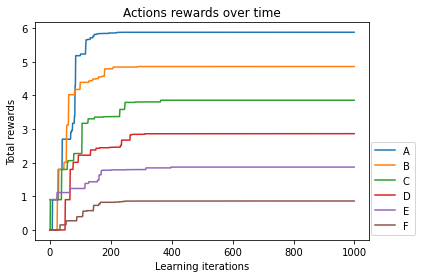

In [27]:
qagent = QAgent(alpha, gamma, rewards)
Q_table,rewards_over_time = qagent.training(iterations = 1000, iter_end_explore = 500)

for i in range(6):
    plt.plot (rewards_over_time[:,i], label=action_to_label[i])
plt.legend(bbox_to_anchor=(1.15, 0), loc='lower right')
plt.title('Actions rewards over time')
plt.xlabel('Learning iterations')
plt.ylabel('Total rewards')

Q_table_df = pd.DataFrame(Q_table,columns=('A','B','C','D','E','F'))
Q_table_df.insert(0, "Pair States", pair_states)
Q_table_df    # The table indicates the rewards learned by the agent

### Let's see the table that stores the total sum of all rewards of each stimuli in all learning iterations

In [28]:
Q_table_sumary = np.array(np.zeros([1,6]))
for i in range(6):
    for k in range(15):
        if Q_table[k,i] > 0:
            Q_table_sumary[0,i] += Q_table[k,i]
        
Q_table_df = pd.DataFrame(Q_table_sumary,columns=('A','B','C','D','E','F')) 
Q_table_df

,A,B,C,D,E,F
0,5.882353,4.862645,3.859181,2.864098,1.869551,0.860723


### The next cell defines Dopamine levels, being that:


1.   Dopamine **burst** leads to **choose** the action with **highest reward** (good option meaning best '**carrot**')
2.   **Low** dopamine leads to **avoid** the action with **lowest** reward (bad option meaning worst '**stick**')

In [29]:
# Get the optimal action
def get_action_from_Qtable(Q, action_1, action_2, DA):
    print(f"Learning reward from the action {action_1}: {Q[0,actions[action_1]]}")        
    print(f"Learning reward from the action {action_2}: {Q[0,actions[action_2]]}")
    action_1 = actions[action_1]
    action_2 = actions[action_2]
    if DA == 1:         # DA = 1 means that there are dopamine bursts
      chosen_action = np.argmax([Q[0,action_1],Q[0,action_2]])
    elif DA == 0:       # DA = 0 means that there is no dopamine or there are very low levels
      chosen_action = np.argmin([Q[0,action_1],Q[0,action_2]])
    if chosen_action == 0:
            chosen_action = action_1
    else:
        chosen_action = action_2
    chosen_action = action_to_label[chosen_action]
    return chosen_action

### Let's test if the agent has learned from the rewards and choose or avoid options depending on dopamine levels

Testing with **high** dopamine levels

In [30]:
chosen_action = get_action_from_Qtable(Q_table_sumary, 'C', 'F', DA = 1)
print(f"My dopamine levels are very high and that is why I choose the option with the highest reward: {chosen_action}")

Learning reward from the action C: 3.8591805963757
Learning reward from the action F: 0.8607233555037815
My dopamine levels are very high and that is why I choose the option with the highest reward: C


Testing with **low** dopamine levels

In [31]:
chosen_action = get_action_from_Qtable (Q_table_sumary,'A','E', DA = 0)
print(f"My dopamine levels are very low and that is why I avoid the option with the lowest reward: {chosen_action}")

Learning reward from the action A: 5.882352941176471
Learning reward from the action E: 1.8695508765357167
My dopamine levels are very low and that is why I avoid the option with the lowest reward: E
